<a href="https://colab.research.google.com/github/KatBotkowska/CodersCrew/blob/master/Zadanie3_grupa5_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza danych dot. GitHub
Celem badania jest analiza danych dotyczących funkcjonowania platformy GitHub, największego serwisu służącego programistom do przechowywania i wspólnej pracy nad kodem. GitHub to największa platforma łącząca społeczność programistów - ponad 12 mln osób pracujących nad 31 mln projektów w ramach GitHub od 2008 r.  
Dane to ponad 3TB informacji udostępnionych przez GitHub, dotyczących m.in. jego zawartości, repozytoriów, plików.

Badanie skupia się na poznaniu struktury zawartości danych w poniższych tematach:

1.   Języki programowania używane w plikach na GitHub
2.   Licencje używane na GitHub
3.   Repozytoria na GitHub 
4.   Komity w repozytoriach na GitHub

**Wykonanie**  Grupa 5

In [0]:
#Importy
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Języki na GitHub

### 1.1 a - I wersja by 'wybrać' dane

*Query by wybrać słownik z kolumny language z informacjami o językach*

In [0]:
queryGit_languages = """
SELECT ARRAY
  (SELECT AS STRUCT name
  FROM UNNEST(language)) as name 
FROM `bigquery-public-data.github_repos.languages` """


In [0]:
dfGit_languages = pd.read_gbq(query = queryGit_languages, project_id = 'it-job-market-project-cc', dialect = 'standard')

In [0]:
dfGit_languages.head(10)

,name
0,[{'name': 'C'}]
1,[{'name': 'C'}]
2,[{'name': 'C'}]
3,[{'name': 'C'}]
4,[{'name': 'C'}]
5,[{'name': 'C'}]
6,[{'name': 'C'}]
7,[{'name': 'C'}]
8,[{'name': 'C'}]
9,[{'name': 'C'}]


In [0]:
dfGit_languages.size

3348696

In [0]:
dfGit_languages['name'][:10]

0    [{'name': 'C'}]
1    [{'name': 'C'}]
2    [{'name': 'C'}]
3    [{'name': 'C'}]
4    [{'name': 'C'}]
5    [{'name': 'C'}]
6    [{'name': 'C'}]
7    [{'name': 'C'}]
8    [{'name': 'C'}]
9    [{'name': 'C'}]
Name: name, dtype: object

*Pętla for by stworzyć array ze słowników z językami*

In [0]:
dfLanguages = []  
for lang in dfGit_languages['name']: 
    dfLanguages.extend(lang) 
dfLanguages[-5:]

[{'name': 'Ruby'},
 {'name': 'Objective-C'},
 {'name': 'Ruby'},
 {'name': 'Objective-C'},
 {'name': 'Ruby'}]

*Pętla for by stworzyć słownik, gdzie keys to nazwa języka, a values to jego ilość wystąpień. Potem przekształcenie w df*

In [0]:
Languages_count = {}
for lang in dfLanguages:
    if lang['name']  not in Languages_count:
        Languages_count[lang['name']]=0
    Languages_count[lang['name']]+=1
        
pdLanguages_count = pd.Series(Languages_count).to_frame('Count').sort_values(by = 'Count', ascending = False)
pdLanguages_count.head(20)   

,Count
JavaScript,1109504
CSS,823170
HTML,786897
Shell,641343
Python,551252
Ruby,378118
Java,371532
PHP,343454
C,294519
C++,280587


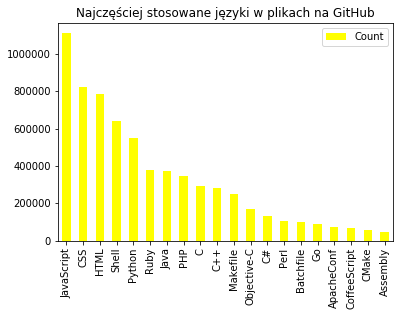

In [0]:
pdLanguages_count.head(20).plot(kind = 'bar', color = ['yellow'], title = 'Najczęściej stosowane języki w plikach na GitHub')   

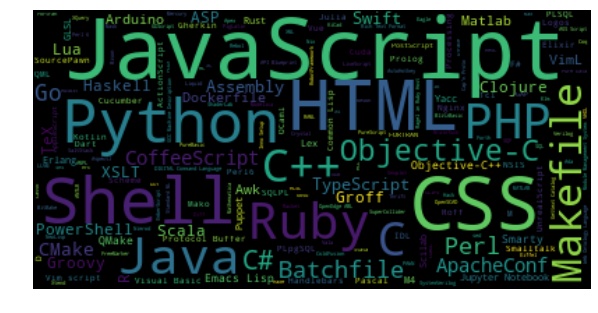

In [0]:
wordcloud = WordCloud().generate_from_frequencies(Languages_count)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 1.1 b -  II wersja by wybrać języki z bazy

In [0]:
queryLang2 = """WITH tmp as (
        SELECT language.name AS name
        FROM `bigquery-public-data.github_repos.languages` l
        CROSS JOIN UNNEST(l.language) as language
        )
        SELECT name, COUNT(*) AS count
        FROM tmp
        GROUP BY name
        ORDER BY count DESC"""

In [0]:
dfLang2 = pd.read_gbq(query = queryLang2, project_id = 'it-job-market-project-cc', dialect = 'standard')

In [0]:
dfLang2.head(10)

,name,count
0,JavaScript,1109502
1,CSS,823178
2,HTML,786876
3,Shell,641321
4,Python,551238
5,Ruby,378128
6,Java,371530
7,PHP,343462
8,C,294523
9,C++,280585


In [0]:
dfLang2.columns = ['languages_name', 'count']

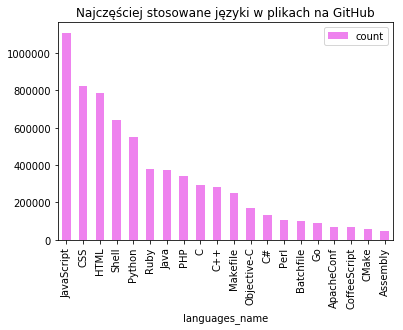

In [0]:
dfLang2.set_index('languages_name').head(20).plot(kind = 'bar', color = ['violet'], title = 'Najczęściej stosowane języki w plikach na GitHub')

Text(0.5, 1.0, 'Najczęściej stosowane języki w plikach na GitHub')

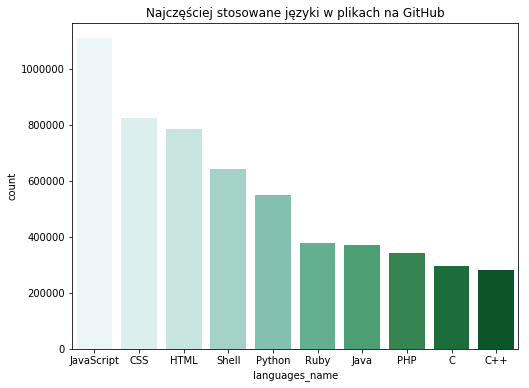

In [0]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'count', x = 'languages_name', data = dfLang2.head(10), palette = 'BuGn')
plt.title('Najczęściej stosowane języki w plikach na GitHub')

### *Podsumowanie*
*Najczęściej spotykanym językiem na GitHub jest Java Script - używany jest w ponad 1 mln repozytoriów. Koejne języki najczęściej spotykane w repozytoriach na GitHub to CSS i HTML (ponad 800 tys. repozytoriów i blisko 800 tys.). Python jest na 5 miejscu w tym zestawieniu, obsługujac ponad 500 tys. repozytoriów.*

## 1.2 Dane o językach w bajtach




In [0]:
queryLang_byte = """WITH tmp as (
        SELECT language.name AS name, language.bytes as bytes
        FROM `bigquery-public-data.github_repos.languages` l
        CROSS JOIN UNNEST(l.language) as language
        )
        SELECT name, SUM(bytes) as total_bytes
        FROM tmp
        GROUP BY name
        ORDER BY total_bytes DESC"""

In [0]:
dfLang_byte = pd.read_gbq(query = queryLang_byte, project_id = 'it-job-market-project-cc', dialect = 'standard')

In [0]:
dfLang_byte.total_bytes = dfLang_byte.total_bytes / 1000000000
dfLang_byte.columns = ['Language_name', 'total_bytes in gb']
dfLang_byte.head(10)


,Language_name,total_bytes in gb
0,C,6094.951724
1,JavaScript,1242.380171
2,C++,512.755034
3,PHP,509.651145
4,HTML,336.673266
5,Java,297.658737
6,Python,183.773263
7,CSS,153.594685
8,Assembly,132.847975
9,C#,124.407596


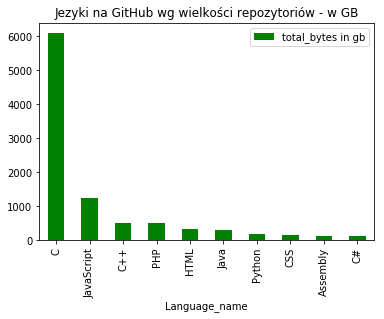

In [0]:
dfLang_byte.set_index('Language_name').head(10).plot(kind = 'bar', color = ['green'], title = 'Jezyki na GitHub wg wielkości repozytoriów - w GB')

Text(0.5, 1.0, 'Jezyki na GitHub wg wielkości repozytoriów - w GB')

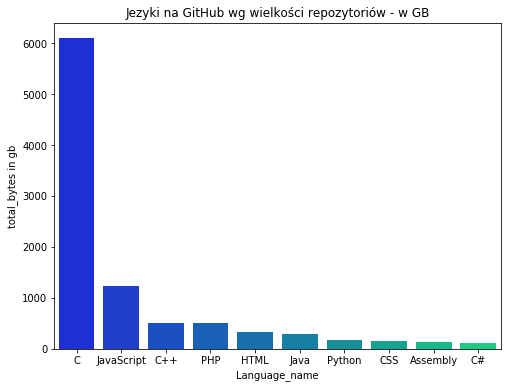

In [0]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'total_bytes in gb', x = 'Language_name', data = dfLang_byte.head(10), palette = 'winter')
plt.title('Jezyki na GitHub wg wielkości repozytoriów - w GB')

### *Podsumowanie*
*Biorąc pod uwagę wielkość repozytoriów obsługiwanych przez dane języki programowania, na prowadzenie wysuwa się C, z ponad 6 tys. GB repozytoriów. JavaScript, który był na pierwszym miejscu biorąc pod uwagę liczbę repozytoriów, w tym przypadku spada na 2 miejsce, jednak ze znacznie mniejszą wielkością repozytoriów - około 1 tys. GB. Na trzecim miejscu jest C++, potem PHP. Python jest na 7 miejscu, zaraz za Java, obsługując 183 GB repozytoriów.*

# 2. Licencje na GitHub

## 2.1 Najpopularniejsze licencje na GitHub wg liczby plików na danej licencji

In [0]:
queryLicenses = """SELECT l.license, COUNT(f.path) AS files_number
FROM `bigquery-public-data.github_repos.files` f
INNER JOIN `bigquery-public-data.github_repos.licenses` as l
ON f.repo_name = l.repo_name
GROUP BY l.license
ORDER BY files_number DESC
"""

In [0]:
dfLicenses = pd.read_gbq(query = queryLicenses, project_id = 'projectcoderscrew2', dialect = 'standard')

In [0]:
dfLicenses.head(10)

,license,files_number
0,mit,921658890
1,gpl-2.0,803788109
2,apache-2.0,217421768
3,gpl-3.0,122744879
4,bsd-3-clause,81784392
5,mpl-2.0,38962974
6,agpl-3.0,34639935
7,bsd-2-clause,18237990
8,lgpl-2.1,16465317
9,lgpl-3.0,12730711


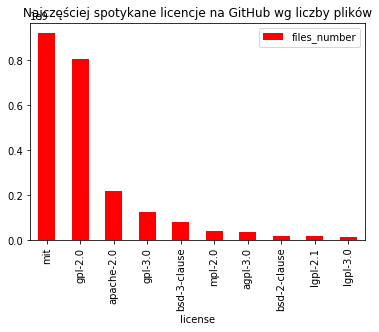

In [0]:
dfLicenses.set_index('license').head(10).plot(kind = 'bar', color = ['red'], title = 'Najczęściej spotykane licencje na GitHub wg liczby plików')

Text(0.5, 1.0, 'Najczęściej spotykane licencje na GitHub wg liczby plików')

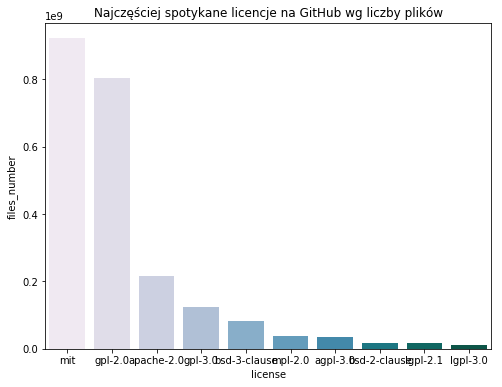

In [0]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'files_number', x = 'license', data = dfLicenses.head(10), palette = 'PuBuGn')
plt.title('Najczęściej spotykane licencje na GitHub wg liczby plików')

### ***Podsumowanie***
*Najczęściej spotykanymi licencjami na GitHub jest mit i gpl (wersja 2.0) - odpowiednio ponad 900 i 800 mln plików. Kolejne licencje w zestawieniu (apache 2.0, czy kolejna wersja gpl) obsługują dużo mniej plików - około 200 mln i mniej.*

##2.2 Najpopularniejsze licencje na GitHub wg liczby repozytoriów

In [0]:
queryLicenses_repo = """SELECT l.license, COUNT(*) AS repos_number
FROM `bigquery-public-data.github_repos.licenses` l
GROUP BY l.license
ORDER BY repos_number DESC"""

In [0]:
dfLicenses_repo = pd.read_gbq(query = queryLicenses_repo, project_id = 'it-job-market-project-cc', dialect = 'standard')

In [0]:
dfLicenses_repo.head(10)

,license,repos_number
0,mit,1709560
1,apache-2.0,493659
2,gpl-2.0,345366
3,gpl-3.0,343384
4,bsd-3-clause,152794
5,bsd-2-clause,55900
6,unlicense,46763
7,agpl-3.0,41437
8,lgpl-3.0,40061
9,cc0-1.0,27008


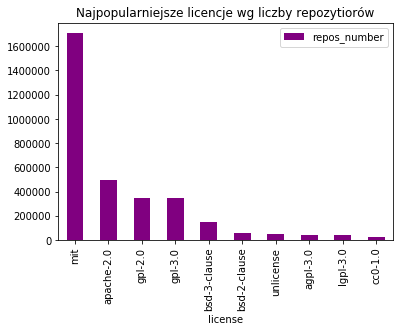

In [0]:
dfLicenses_repo.set_index('license').head(10).plot.bar(color = 'purple', title = 'Najpopularniejsze licencje wg liczby repozytiorów')

### ***Podsumowanie***
*Biorąc pod uwagę liczbę obsługiwanych repozytoriów, na 1 miejscu plasuje się mit z ponad 1,7 mln obsługiwanych repozytoriów. Kolejne na liście licencje obejmują 3 razy mniej repozytoriów - apache 2.0 niecałe 500 tys, gpl 2.0 około 350 tys, zaraz za nim jest kolejna wersja gpl.
Z obu powyższych zestawień wynika, że najczęściej wykorzystywaną przez programistów licencją jest mit - czego powodem jest prostota tej licencji oraz liberalne zasady użytkowania.*

# 3. Analiza repozytoriów na GitHub

##3.1  Najbardziej aktywne repozytoria  wg liczby komitów

In [0]:
queryRepo_commits = """SELECT repo_name, COUNT(*) AS commits_number 
FROM `bigquery-public-data.github_repos.commits`
CROSS JOIN UNNEST(repo_name) as repo_name
GROUP BY repo_name
ORDER BY commits_number DESC
"""

In [0]:
dfRepo_commits = pd.read_gbq(query = queryRepo_commits, project_id = 'it-job-market-project-cc', dialect = 'standard')

In [0]:
dfRepo_commits.head(10)

,repo_name,commits_number
0,shenzhouzd/update,1188925
1,g0v-data/mirror,838685
2,openwrt-es/linux,826097
3,c0d3z3r0/linux-rockchip,825566
4,Taeung/tip,815917
5,Pingmin/linux,812644
6,uniphier/linux-unph,810847
7,gazoo74/linux,810566
8,mpe/powerpc,810275
9,codeaurora-unoffical/linux-msm,797919


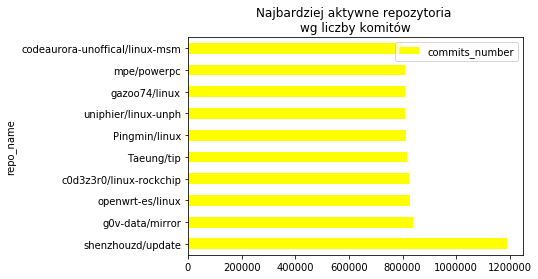

In [0]:
dfRepo_commits.set_index('repo_name').head(10).plot(kind = 'barh', color = ['yellow'], title = 'Najbardziej aktywne repozytoria \nwg liczby komitów')

Text(0.5, 1.0, 'Najbardziej aktywne repozytoria \nwg liczby komitów')

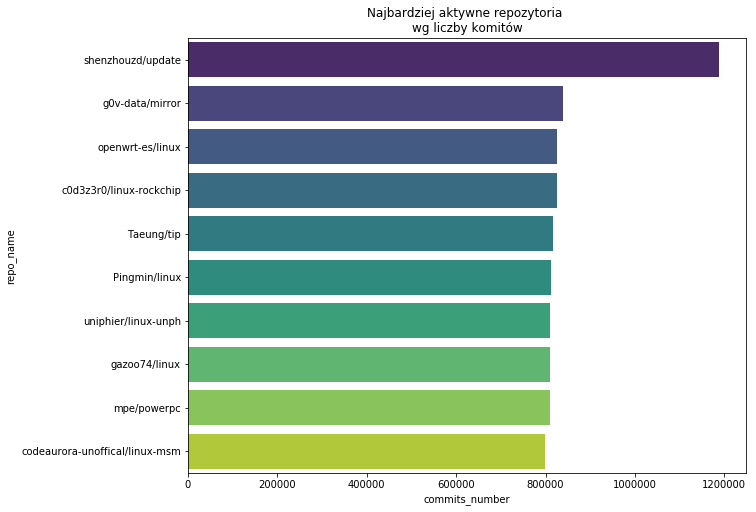

In [0]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'commits_number', y = 'repo_name', data = dfRepo_commits.head(10), palette = 'viridis')
plt.title('Najbardziej aktywne repozytoria \nwg liczby komitów')

### ***Podsumowanie***
*Największym repozytorium biorąc pod uwagę liczbę dokonywanych komitów jest shenzhoudz/update, do którego dokonano prawie 1,2 mln komitów. Kolejne repozytoria na liście otrzymały około 800 tys. komitów i mniej - są to gOv-data/mirror oraz openwrt-es/linux.*

## 3.2 Największe repozytoria

In [0]:
queryRepo_size = """
SELECT name, size
FROM
(SELECT f.repo_name as name, SUM(c.size) AS size 
FROM `bigquery-public-data.github_repos.contents` c
INNER JOIN `bigquery-public-data.github_repos.files` as f
ON f.id = c.id
GROUP BY name)
ORDER BY size DESC"""

In [0]:
dfRepo_size = pd.read_gbq(query = queryRepo_size, project_id = 'projectcoderscrew', dialect = 'standard')

In [0]:
dfRepo_size.head(10)

,name,size
0,cdnjs/cdnjs,157788210416
1,extend1994/cdnjs,157788049268
2,sufuf3/cdnjs,157788049268
3,jonobr1/cdnjs,137961682501
4,seogi1004/cdnjs,135302281431
5,sashberd/cdnjs,131619524841
6,ahocevar/cdnjs,126085295194
7,holtkamp/cdnjs,117635257892
8,wout/cdnjs,113124771661
9,jdh8/cdnjs,107000997075


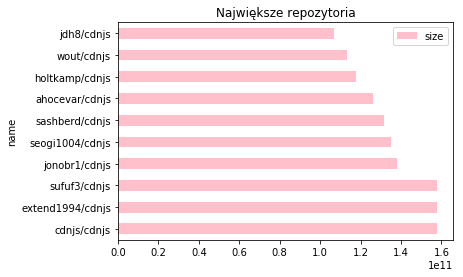

In [0]:
dfRepo_size.set_index('name').head(10).plot(kind = 'barh', color = ['pink'], title = 'Największe repozytoria')

Text(0.5, 1.0, 'Największe repozytoria')

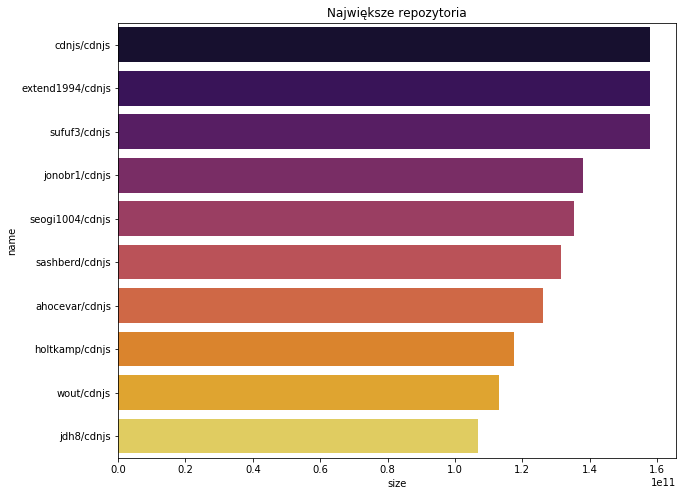

In [0]:
plt.figure(figsize = (10,8))
sns.barplot(y = 'name', x = 'size', data = dfRepo_size.head(10), palette = 'inferno')
plt.title('Największe repozytoria')

### ***Podsumowanie***
*Trzy największe repozytoria pod względem wielkości to cdnjs/cdnjs, extend1994/cdnsj oraz sufuf3/cdnsj. Nazwy repozytoriów z pierwszej dziesiątki największych repozytoriów na GitHub wskazują, że dotyczą one CDNJS - opensourcowego projektu rozwijanego przez społeczność programistów. Jest to najsłynniejsze darmowa oraz publiczna webowa usługa dostarczania treści. Jej popularność rzutuje na wielkość repozytoriów na GitHub.*

##3.3  Repozytoria z największą liczbą obserwujących

In [0]:
queryWatchers = """
SELECT  repo_name, watch_count
FROM `bigquery-public-data.github_repos.sample_repos`
ORDER BY watch_count DESC"""

In [0]:
dfWatchers = pd.read_gbq(query = queryWatchers, project_id = 'it-job-market-project-cc', dialect = 'standard')

In [0]:
dfWatchers.head(10)

,repo_name,watch_count
0,FreeCodeCamp/FreeCodeCamp,90457
1,firehol/netdata,13208
2,joshbuchea/HEAD,13125
3,braydie/HowToBeAProgrammer,12019
4,sindresorhus/awesome,11063
5,tensorflow/tensorflow,10728
6,facebook/react,10458
7,ParsePlatform/parse-server,10339
8,loverajoel/jstips,9585
9,facebook/react-native,9437


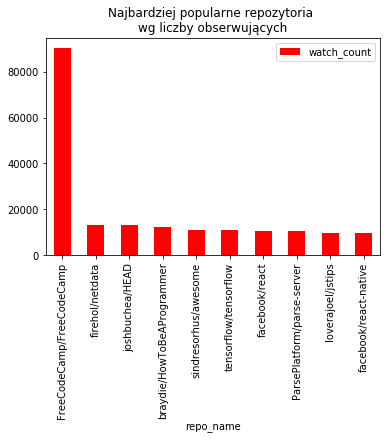

In [0]:
dfWatchers.set_index('repo_name').head(10).plot(kind = 'bar', color = ['red'], title = 'Najbardziej popularne repozytoria \nwg liczby obserwujących')

### ***Podsumowanie***
*Dane na temat najbardziej popularnych repozytoriów pochodzą ze zbioru danych sample_repos. Wskazuje to na to, że by ograniczyć ilość przetwarzanych danych, GitHub udostępnił dane wybrane wg statystycznej techniki próbkowania używanej by polepszyć analizy big data. 
Z tych danych wynika, że najbardziej popularnym repozytorium jest FreeCodeCamp - opensourcowa baza danych służąca programistom do wspólnej darmowej nauki. Posiada ona ponad 90 tys. obserwujących. Kolejne repozytoria na liście posiadają dużo mniej obserwujących, 13 tys. i mniej. Widać z tego, że najbardziej popularne repozytoria związane są z wspólną nauką kodowania.*

## 3.4 Repozytoria z największą liczbą autorów komitów


In [0]:
queryRepo_authors = """
SELECT repo_name, COUNT(DISTINCT author.name) as author_count
FROM `bigquery-public-data.github_repos.commits` c
CROSS JOIN UNNEST(c.repo_name) as repo_name
GROUP BY repo_name
ORDER BY author_count DESC
LIMIT 100
"""

In [0]:
dfRepo_authors = pd.read_gbq(query = queryRepo_authors, project_id = 'test-it-job-market', dialect = 'standard')

In [0]:
dfRepo_authors.head(10)

,repo_name,author_count
0,openwrt-es/linux,20048
1,c0d3z3r0/linux-rockchip,20027
2,Taeung/tip,19838
3,Pingmin/linux,19782
4,uniphier/linux-unph,19713
5,gazoo74/linux,19705
6,mpe/powerpc,19701
7,codeaurora-unoffical/linux-msm,19422
8,NicolasDichtel/linux,19405
9,rneugeba/linux-stable,19388


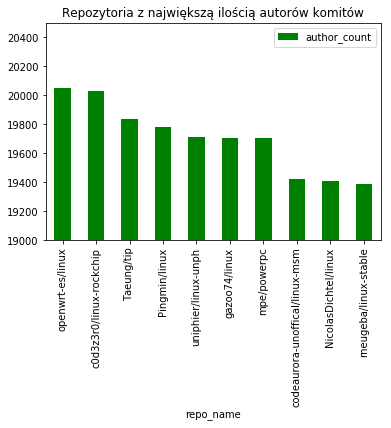

In [0]:
dfRepo_authors.set_index('repo_name').head(10).plot(kind = 'bar', color = ['green'], title = 'Repozytoria z największą ilością autorów komitów', ylim = [19000, 20500])

### ***Podsumowanie***
*Największa ilość autorów komitów występuje w repozytoriach: openwrt-es/linux i cOd3z3r0/linux-rockchip - ponad 20 tys. osób. Kolejne repozytoria mają poniżej 20 tys. unikalnych komitujących. Z zestawienia wynika, że są to najczęściej repozytoria dot. linuxa (7 na 10 pierwszych pozycji w zestawieniu), czyli wolnego i otwartego oprogramowania, rozwijanego przez społeczność programistów.*

## **3.5 Autorzy komitów -do ilu repozytoriów komitują**

*Założenie - do analizy wykorzystano adresy email autorów komitów do repozytoriów. Zakładamy, że w celu ochrony danych osobowych użytkowników adresy email zostały zanonimizowane, natomiast zanonimizowane adresy email są identyczne dla danego użytkownika przy różnych komitach.*

In [0]:
queryRepos_perAuthor = """
SELECT author.name, COUNT(DISTINCT repo_name) as repos_count
FROM `bigquery-public-data.github_repos.commits` c
CROSS JOIN UNNEST(c.repo_name) as repo_name
GROUP BY author.email, author.name
ORDER BY repos_count DESC
LIMIT 100
"""

In [0]:
dfRepos_perAuthor = pd.read_gbq(query = queryRepos_perAuthor, project_id = 'projectcoderscrew3', dialect = 'standard')

In [0]:
dfRepos_perAuthor.head(10)

,name,repos_count
0,The Gitter Badger,30670
1,Pascal Borreli,15289
2,Bitdeli Chef,12860
3,Brandon Philips,11588
4,PatrickJS,9414
5,Eric Paris,9011
6,Mike Frysinger,8916
7,Shaun Jackman,8529
8,Sindre Sorhus,8463
9,Tim Hockin,8419


Text(0.5, 1.0, 'Autorzy komitów \n- liczba repozytoriów do których komitują')

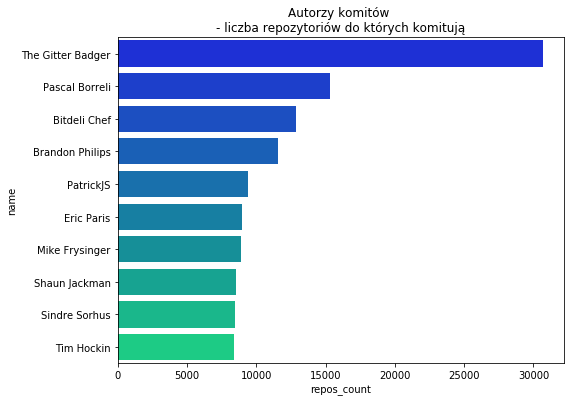

In [0]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'repos_count', y = 'name', data = dfRepos_perAuthor.head(10), palette = 'winter')
plt.title('Autorzy komitów \n- liczba repozytoriów do których komitują')

***Podsumowanie***

*Z danych wynika, że najbardziej aktywnym użytkownikiem, jeśli chodzi o liczbę "obsługiwanych" repozytoriów jest The Gitter Badger, który komituje do ponad 30 tys. unikalnych repozytoriów. Kolejny na liście, Pascal Boreli, obsługuje o połowę mniej repozytoriów. Użytkownicy na pozycjach 2-4 obsługują pomiędzy 12 a 15 tys. repozytoriów. Kolejni z 10 najaktywniejszych w tym zestawieniu użytkowników obsługuje około 8 tys. repozytoriów.*

## 3.6 Dane o kodowaniu w repozytoriach

In [0]:
queryEncoding = """
SELECT encoding, COUNT(*) as encoding_count
FROM `bigquery-public-data.github_repos.commits` 
GROUP BY encoding
ORDER BY encoding_count DESC
LIMIT 100"""

In [0]:
dfEncoding = pd.read_gbq(query = queryEncoding, project_id = 'projectcoderscrew', dialect = 'standard')

In [0]:
dfEncoding.head(10)

,encoding,encoding_count
0,None,231116457
1,UTF-8,38962
2,ISO-8859-1,16742
3,ISO-8859-15,5415
4,ascii,4845
5,latin1,3895
6,ISO-8859-2,3746
7,gbk,3285
8,GB2312,2875
9,iso-latin-1,2713


In [0]:
encodingSum = dfEncoding.sum(axis = 0)
encodingSum

encoding_count    231215391
dtype: int64

In [0]:
dfEncoding['encoding in %'] = dfEncoding.encoding_count/231215391*100

In [0]:
dfEncoding.head(10)

,encoding,encoding_count,encoding in %
0,None,231116457,99.957211
1,UTF-8,38962,0.016851
2,ISO-8859-1,16742,0.007241
3,ISO-8859-15,5415,0.002342
4,ascii,4845,0.002095
5,latin1,3895,0.001685
6,ISO-8859-2,3746,0.001620
7,gbk,3285,0.001421
8,GB2312,2875,0.001243
9,iso-latin-1,2713,0.001173


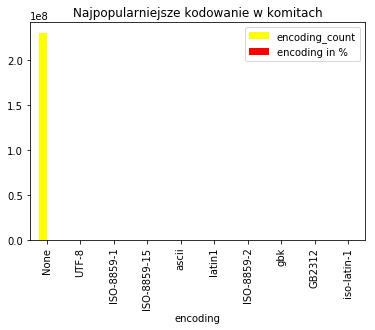

In [0]:
dfEncoding.set_index('encoding').head(10).plot(kind = 'bar', color = ['yellow', 'red'], title = 'Najpopularniejsze kodowanie w komitach')

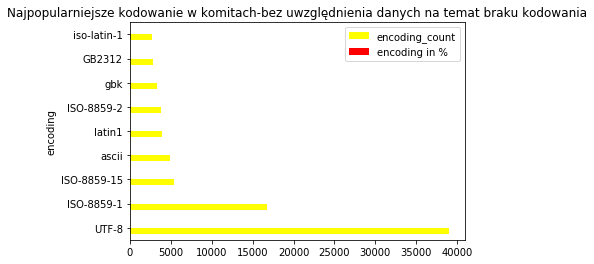

In [0]:
dfEncoding.set_index('encoding')[1:10].plot(kind = 'barh', color = ['yellow', 'red'], title = 'Najpopularniejsze kodowanie w komitach-bez uwzględnienia danych na temat braku kodowania')

### ***Podsumowanie***
*Z danych wynika, że w ponad 99,96 % komitów nie jest wskazane kodowanie znaków. Z komitów, w których podano kodowanie znaków, najpopularniejszym jest UTF 8, potem w zestawieniu pojawiają się kodowania ISO oraz ASCII.*

# 4. Analiza komitów na GitHub

##4.1 Łączna ilość komitów na GitHub

In [0]:
queryCommits_sum = """SELECT COUNT(commit) as commits_sum
FROM `bigquery-public-data.github_repos.commits`
"""

In [0]:
dfCommits_sum = pd.read_gbq(query = queryCommits_sum, project_id = 'projectcoderscrew', dialect = 'standard')

In [0]:
dfCommits_sum

,commits_sum
0,230832790


### ***Podsumowanie***
*Ilość komitów dokonana na GitHub do marca b.r. to ponad 230 mln. Ta ilość świadczy o ogromnej popularności GitHub wśród programistów jako narzędzia do przechowywania i współdzielenia kodu. Potwierdza to cenę, za jaką Microsotf nabył GitHub w ubiegłym roku.*

##4.2  Użytkownicy GitHub o największej ilości komitów

In [0]:
queryCommits_authors = """
SELECT  
author.name as author, COUNT(*) AS commits_count
FROM `bigquery-public-data.github_repos.commits` c
GROUP BY author 
ORDER BY commits_count DESC
LIMIT 10"""

In [0]:
dfCommits_authors = pd.read_gbq(query = queryCommits_authors, project_id = 'projectcoderscrew', dialect = 'standard')

In [0]:
dfCommits_authors

,author,commits_count
0,shenzhouzd,1188430
1,Auto Pilot,825592
2,Duane F. King,597940
3,Marge Spiderworthy,495786
4,Curt Clifton,384915
5,James Michael DuPont,343258
6,unknown,303504
7,time,286933
8,miatribepi,279802
9,aatchison,262278


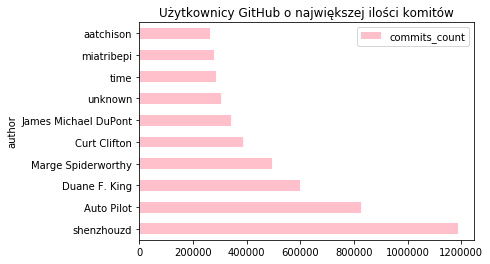

In [0]:
dfCommits_authors.set_index('author').plot(kind = 'barh', color = ['pink'], title = 'Użytkownicy GitHub o największej ilości komitów')

### ***Podsumowanie***
*Najbardziej aktywny użytkownik GitHub - shenzhouzd	- dokonał ponad 1,1 mln komitów. Kolejny na liście Auto Pilot, powyżej 800 tys. komitów. Ilość komitów dokonana przez najbardziej aktywnych użytkowników świadczy o popularności narzędzia wśród programistów.*

## 4.3 Analiza treści tematów komitów

In [0]:
queryCommits_subject = """
SELECT subject
FROM `bigquery-public-data.github_repos.commits` 
WHERE LENGTH( subject )<=10"""

In [0]:
dfCommits_subject = pd.read_gbq(query = queryCommits_subject, project_id = 'projectcoderscrew', dialect = 'standard')

In [0]:
commits_subject = ' '.join(dfCommits_subject.subject).lower()

In [0]:
commits_subject[:100]

'descr minor fix changelog gitfiti nothing add file merge. controller 되돌림 fixed it bug#10193 new giti'

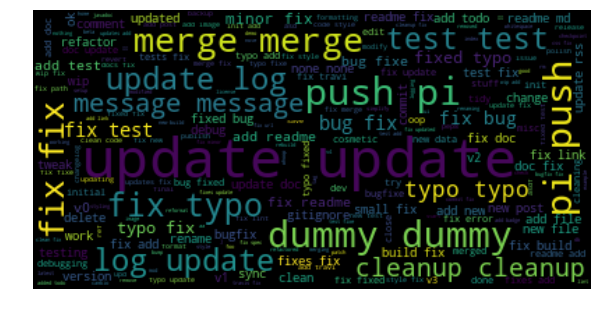

In [0]:
wordcloud = WordCloud().generate(commits_subject)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### ***Podsumowanie***
*Najczęściej spotykanym słowem w komitach jest 'update' - aktualizacja pliku jest zwykle najczęstszym powodem dokonywania kolejnych komitów. Kolejne słowa, jak np. merge, czy push dotyczą sposobu dokonywania komitów na GitHub. Cleanup, fix, fixes, test, czy bug również związane są z poprawkami kodu dokonywanymi poprzez komitowanie plików. Zastanawia mnie znaczenie dummy - czy jako głupie (oddające stosunek osoby komitującej do tego komitu), czy tutaj występuje w znaczeniu 'pusty, fikcyjny'.*

## 4.4 a Najczęstsze rozszerzenia w plikach na GitHub

In [0]:
queryExt = """
SELECT REGEXP_EXTRACT(path, r'/\.[0-9 a-z]+$') as rozszerzenie, COUNT(*) as count 
FROM `bigquery-public-data.github_repos.files` 
GROUP BY rozszerzenie
ORDER BY count DESC
LIMIT 1000"""

In [0]:
dfExt = pd.read_gbq(query = queryExt, project_id = 'projectcoderscrew', dialect = 'standard')

In [0]:
dfExt.head(10)

,rozszerzenie,count
0,None,2286776614
1,/.gitignore,3116273
2,/.npmignore,2813375
3,/.gitkeep,816271
4,/.jshintrc,455376
5,/.keep,383776
6,/.project,337282
7,/.htaccess,284568
8,/.classpath,260213
9,/.editorconfig,151533


In [0]:
dfExt['rozszerzenie'] = dfExt['rozszerzenie'].str.replace('/', '')
dfExt.head(10)

,rozszerzenie,count
0,None,2286776614
1,.gitignore,3116273
2,.npmignore,2813375
3,.gitkeep,816271
4,.jshintrc,455376
5,.keep,383776
6,.project,337282
7,.htaccess,284568
8,.classpath,260213
9,.editorconfig,151533


In [0]:
dictExt = dfExt.set_index('rozszerzenie')['count'].to_dict()
#trzeba usunąć None - brak rozszerzenia, bo dla takiej danej nie zrobi wordcloud
del dictExt[None]
dictExt

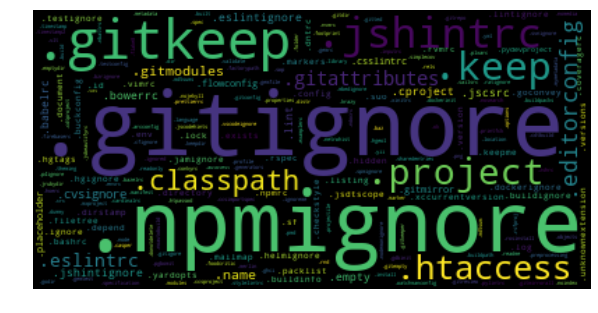

In [0]:
wordcloud = WordCloud().generate_from_frequencies(dictExt)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 4.4 b Najczęstsze rozszerzenia w plikach na GitHub - bez Gitignore

In [0]:
queryExt2 = """
SELECT REGEXP_EXTRACT(path, r'\.[0-9 a-z]+$') as rozszerzenie, COUNT(*) as count 
FROM `bigquery-public-data.github_repos.files` 
GROUP BY rozszerzenie
ORDER BY count DESC
LIMIT 1000"""

In [0]:
dfExt2 = pd.read_gbq(query = queryExt2, project_id = 'projectcoderscrew2', dialect = 'standard')
dfExt2.head(10)

,rozszerzenie,count
0,.png,431445327
1,.js,284905981
2,.c,273045468
3,.h,252222204
4,None,136007851
5,.php,92291817
6,.java,57111214
7,.txt,52730787
8,.html,46427550
9,.css,41051687


In [0]:
dictExt2 = dfExt2.set_index('rozszerzenie')['count'].to_dict()
del dictExt2[None]

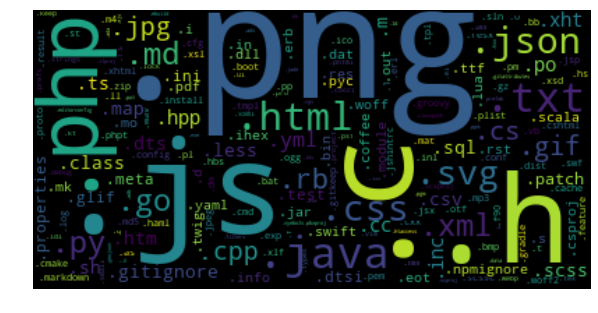

In [0]:
wordcloud = WordCloud().generate_from_frequencies(dictExt2)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### ***Podsumowanie***
*Najczęściej spotykanymi rozszerzeniami plików na GitHub są te dotyczące przesyłania plików do repozytorium, jak np. .gitignore czy .npmignore służące do pomijania plików z tym rozszerzeniem przy dodawaniu zmian do repozytorium czy .gitkeep, wskazujące na foldery, które powinny być przesłane do repozytorium niezależnie od zawartości. 
Jeśli do analizy wybierzemy same rozszerzenia przesyłanych plików, najczęściej spotykane są rozszerzenia .png, .js,  .h, .c czy .php*

## 4.5  Wybrane rozszerzenia plików na GitHub

In [0]:
queryExtLang = '''
SELECT REGEXP_EXTRACT(path, r'\.[0-9 a-z]+$') as rozszerzenie, COUNT(*) as count 
FROM `bigquery-public-data.github_repos.files`
WHERE path LIKE '%.py' OR path LIKE '%.ipynb'OR path LIKE '%.java' 
GROUP BY rozszerzenie
ORDER BY count DESC'''

In [0]:
dfExtLang = pd.read_gbq(query = queryExtLang, project_id = 'projectcoderscrew2', dialect = 'standard')
dfExtLang

,rozszerzenie,count
0,.java,57135190
1,.py,26463252
2,.ipynb,232092


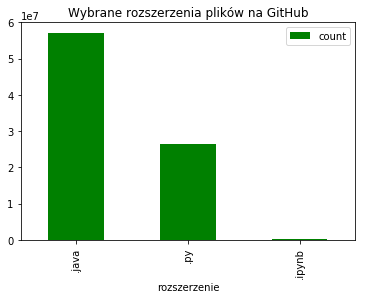

In [0]:
dfExtLang.set_index('rozszerzenie').plot(kind = 'bar', color = ['green'], title = 'Wybrane rozszerzenia plików na GitHub')

### ***Podsumowanie***
*Biorąc do analizy rozszerzenia plików dla języków java i python, można zauważyć, że plików javy jest ponad dwa razy więcej niż plików z rozszerzeniem .py. Chociaż ilościowo i tak dane na temat ilości takich plików liczone są w dziesiątkach milionów. Pliki z rozszerzeniem .ipynb (pliki Google Colab) w porównaniu do ilości plików czysto pythonowych są nieliczne (około 230 tys. w porównaniu do ponad 26 mln).*